In [8]:
import sympy as sp
sp.init_printing()

### Simbolos
v0, t, g, theta, k = sp.symbols('v0, t, g, theta, k')
### Funcoes
x = sp.Function('x')
y = sp.Function('y')

### x
eqx = sp.Eq(x(t).diff(t,2), -k*x(t).diff(t,1))
eqx

eqxS = sp.Eq(x(t).diff(t,2), 0)

In [9]:
### y
eqy = sp.Eq(y(t).diff(t,2), -g-k*y(t).diff(t,1))
eqy

eqyS = sp.Eq(y(t).diff(t,2), -g)

In [10]:
### Solucao em x
xsol = sp.dsolve(eqx, ics={x(0):0, x(t).diff(t,1).subs(t,0):v0*sp.cos(theta)})
xsol

xsolS = sp.dsolve(eqxS, ics={x(0):0, x(t).diff(t,1).subs(t,0):v0*sp.cos(theta)})

In [11]:
### Solucao em y
ysol = sp.dsolve(eqy, ics={y(0):0, y(t).diff(t,1).subs(t,0):v0*sp.sin(theta)})
ysol

ysolS = sp.dsolve(eqyS, ics={y(0):0, y(t).diff(t,1).subs(t,0):v0*sp.sin(theta)})


In [15]:
#### Lambdificacao
import numpy as np
import matplotlib.pyplot as plt

#### malha de pontos tempo t
tl = np.linspace(0,100,200)
th = (np.pi*60.0)/180.0
vi = 600.0
ki = 0.01 ( theta = 60, v0 = 600 m/s)

In [16]:
x_t = sp.lambdify(t, xsol.rhs.subs({v0:vi, theta:th, k:ki}),'numpy')
y_t = sp.lambdify(t,ysol.rhs.subs({v0:vi, theta:th, g:9.8, k:ki}),'numpy')

x_tS = sp.lambdify(t, xsolS.rhs.subs({v0:vi, theta:th}),'numpy')
y_tS = sp.lambdify(t,ysolS.rhs.subs({v0:vi, theta:th, g:9.8}),'numpy')

Xp = x_t(tl)
Yp = y_t(tl)

XpS = x_tS(tl)
YpS = y_tS(tl)

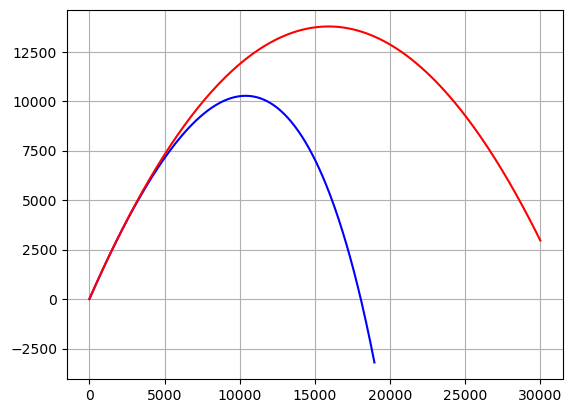

In [17]:
plt.plot(Xp,Yp,color='blue',label='Com Resistencia')
plt.plot(XpS,YpS,color='red', label='Sem Resistencia')
plt.grid()
plt.show()